In [6]:
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline
mp.rcParams['axes.linewidth'] = 1.0
mp.rcParams['lines.linewidth'] = 1.0
mp.rcParams['patch.linewidth'] = 1.0
mp.rcParams.update({'font.size': 10})

# Initial setup and tests

In [7]:
import sys
sys.path.append('./emission_modules/')

import jensen_gtf_nottingham as jensen
import fowler_nordheim_current as fn
import richardson_current as richardson

In [8]:
F = 4.0
T = 1000
phi = 4.5
print('%.3e'%jensen.j(F, T, phi))
print('%.3e'%fn.j(F, phi))
print('%.3e'%fn.j_temp(F, T, phi))
print('%.3e'%richardson.j(F, T, phi))

1.741e+08
1.125e+08
1.663e+08
3.134e+01


# Emission current plots

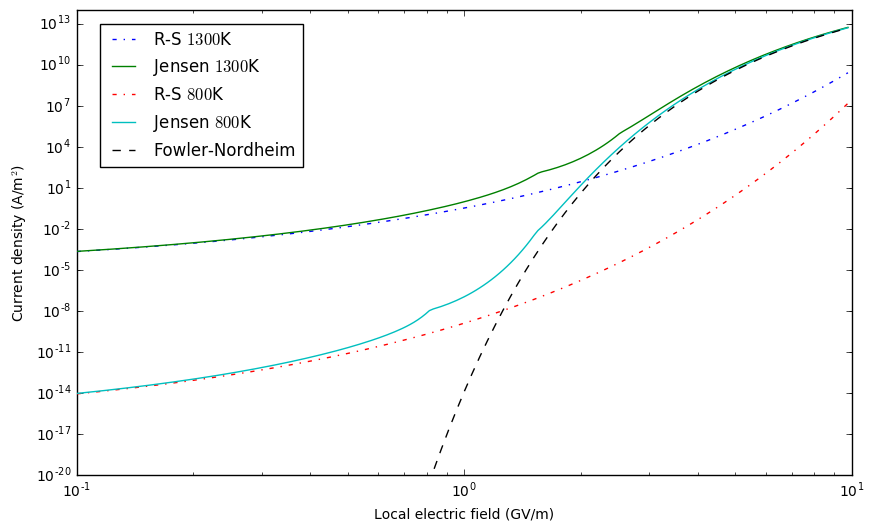

Time taken: 0.726616


In [9]:
tic=time.time()
plt.figure(figsize=(10, 6))
T_data = [1300.0, 800.0]
fs = 10**np.arange(-1.0, 1.0, 0.01)
phi = 4.5

for T in T_data:
    j_richardson = [richardson.j(f, T, phi) for f in fs]
    plt.plot(fs, j_richardson, '-.', label="R-S $%d$K"%T,zorder=4)
    
    j_jensen = [jensen.j(f, T, phi) for f in fs]
    plt.plot(fs, j_jensen, '-', label="Jensen $%d$K"%T,zorder=4)

j_fn = [fn.j(f, phi) for f in fs]
plt.plot(fs, j_fn, 'k--', label="Fowler-Nordheim",zorder=4)

plt.xlabel("Local electric field (GV/m)")
plt.ylabel("Current density (A/m$^2$)")
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-20, 1e14])
lgd = plt.legend(bbox_to_anchor=(0.03, 0.97), loc="upper left", borderaxespad=0.)

#plt.savefig('./fig/direct_fn_currents.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.savefig('./fig/direct_fn_currents.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
print("Time taken: %f"%(time.time()-tic))

# Nottingham plots

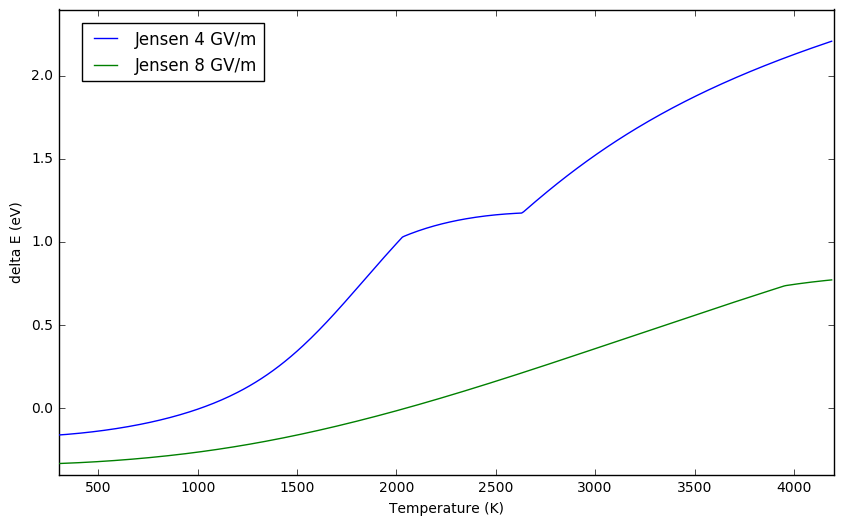

Time taken: 0.212453


In [10]:
tic=time.time()
plt.figure(figsize=(10, 6))
F_data = [4.0, 8.0]
ts = np.arange(200, 4200, 10)
phi = 4.5

for F in F_data:
    de_jensen = [jensen.deltaE(F, t, phi) for t in ts]
    plt.plot(ts, de_jensen, '-', label="Jensen %d GV/m"%F,zorder=4)

plt.xlabel("Temperature (K)")
plt.ylabel("delta E (eV)")
plt.axis((300,4200, -0.4, 2.4))
lgd = plt.legend(bbox_to_anchor=(0.03, 0.97), loc="upper left", borderaxespad=0.)

#plt.savefig('./fig/direct_fn_currents.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.savefig('./fig/direct_fn_currents.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
print("Time taken: %f"%(time.time()-tic))